In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [66]:
import numpy as np
import pandas as pd

In [67]:
 import datetime as dt

In [68]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, extract

In [69]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [70]:
# reflect an existing database into a new model

# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station
measurement = Base.classes.measurement

In [71]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [72]:
 inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    
    
rows = inspector.get_columns('Station')
for r in rows:
    print(r['name'], r["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [73]:
# Latest Date
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [74]:
# Latest Date
#str_dec= "2017"
#query_date = x - dt.timedelta(month=12)
#print("Query Date: ", query_date)
#results= session.query(measurement.date,measurement.prcp).\
   #filter(extract('year', measurement.date)==2017).filter(extract('year', measurement.date)==2016).all()
#results= session.query(measurement.date,measurement.prcp).\
   #filter(measurement.date <= '2017-08-23', measurement.date >= '2016-08-23').all()
    
    
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

results



[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

Text(0, 0.5, 'Inches')

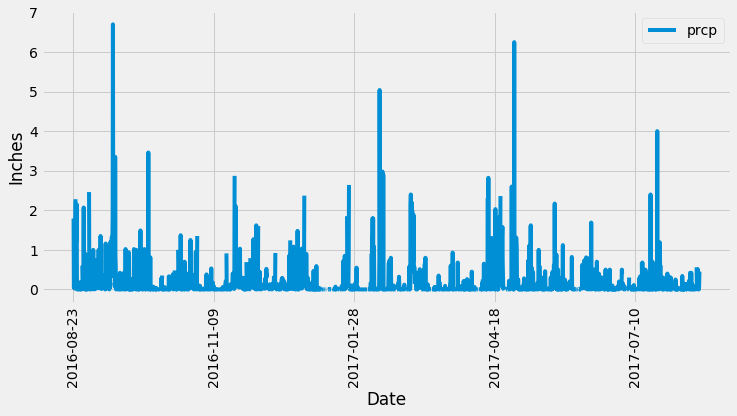

In [81]:

df = pd.DataFrame(results, columns=['date', 'prcp'])
#df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_values("date")
# Use Pandas Plotting with Matplotlib to plot the data

df.set_index(df['date'], inplace=True)
df.plot(rot=90,figsize=(11,5))
plt.xlabel("Date")
plt.ylabel("Inches")


#af = df[['date', 'prcp']].head(20)

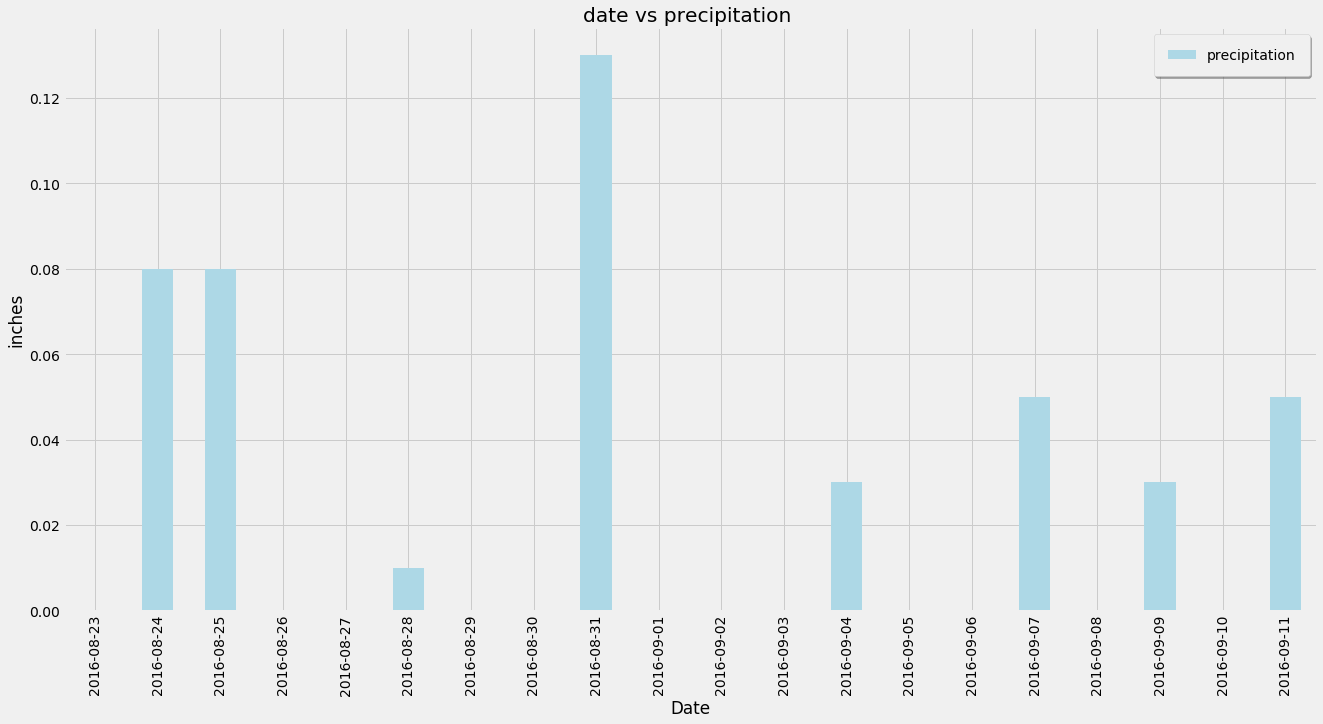

In [12]:
#df.plot.bar(x='date', y='prcp', rot=0)
#df.plot(kind='bar',x= 'date',y= 'prcp')

multi_plot = af.set_index('date').plot(kind="bar" , figsize=(20,10),color="lightblue", label="date and prcp values")

#PandasPlot.set_xticklabels() can be used to set the tick labels as well
#multi_plot.set_xticklabels( , rotation=45)

Gender = [ 'precipitation']
plt.legend(Gender, loc="best",fancybox=True, framealpha=1, shadow=True, borderpad=1, ncol=2)
plt.xlabel("Date")
plt.ylabel("inches")
plt.title("date vs precipitation ")
plt.show() 
#plt.tight_layout()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

af.describe()

,prcp
count,18.000000
mean,0.025556
std,0.038229
min,0.000000
25%,0.000000
50%,0.000000
75%,0.045000
max,0.130000


In [43]:
#how many stations are available ?

#session.execute('select count(*) from station;')
provoked = session.query(func.count(Station.station)).all()
print(f"the no of stations in the dataset are '{provoked}'")

the no of stations in the dataset are '[(9,)]'


In [45]:
#List the stations and observation counts in descending order.

#session.query(station.station,func.count(measurement.tobs)).group_by(station.station).\
  # order_by(station.station.desc()).all()

session.query(Station.station,func.count(measurement.tobs)).group_by(Station.station).filter(Station.station == measurement.station).limit(30).all()

#session.query(Station.station,func.count(measurement.tobs)).group_by(Station.station).\
   #order_by(Station.station.desc()).all()


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [53]:
#Which station has the highest number of observations?
#What are the most active stations? (i.e. what stations have the most rows)?

print("station with most rows may be USC00519281")


#Using the station id from the previous query, calculate the lowest temperature recorded,# highest temperature recorded,
#and average temperature of the most active station?
    
    
y = session.query(station.station,func.min(measurement.tobs)).filter_by(station = "USC00519281").filter(station.station == measurement.station).all()

print(f"the stationwith lowest temperature is '{y}' ")

z = session.query(station.station,func.max(measurement.tobs)).filter_by(station = "USC00519281").filter(station.station == measurement.station).all()

print(f"the station with highest temperature is '{z}' ")


d = session.query(station.station,func.avg(measurement.tobs)).filter_by(station = "USC00519281").filter(station.station == measurement.station).all()

print(f"the station with average temperature is '{d}' ")

station with most rows may be USC00519281
the stationwith lowest temperature is '[('USC00519281', 54.0)]' 
the station with highest temperature is '[('USC00519281', 85.0)]' 
the station with average temperature is '[('USC00519281', 71.66378066378067)]' 


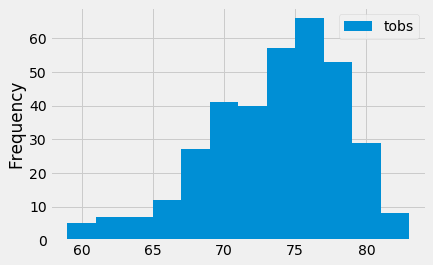

In [62]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS).
#Filter by the station with the highest number of observations.
#Plot the results as a histogram with bins=12



prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results1 = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= prev_year).all()
ef = pd.DataFrame(results1, columns=['tobs'])
ef.plot.hist(bins=12)

